In [58]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [59]:
# lendo a base de dados
imoveis= pd.read_csv(r'Arquivo_Valorizacao_Ambiental.csv', sep=';')


In [60]:
# visualizando alguns dados
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [61]:
# visualizando formatos das variáveis
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [62]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(imoveis.isnull().sum(),imoveis.isnull().sum()/len(imoveis)), columns=['Count', 'Proportion'], index=imoveis.columns)


,Count,Proportion
Ordem,0,0.0
Valor,0,0.0
Area,0,0.0
IA,0,0.0
Andar,0,0.0
Suites,0,0.0
Vista,0,0.0
DistBM,0,0.0
Semruido,0,0.0
AV100m,0,0.0


In [63]:
# descritivo das variáveis: medidas resumo
imoveis.describe().round(2) 


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Text(0.5, 1.0, 'Histograma Valor')

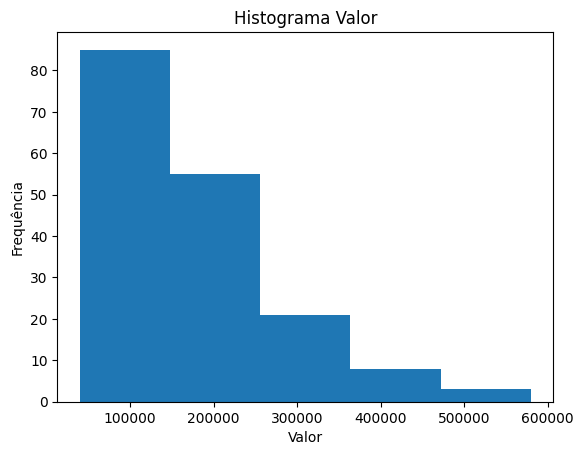

In [64]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(imoveis['Valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor')



Text(0, 0.5, 'Número de casos')

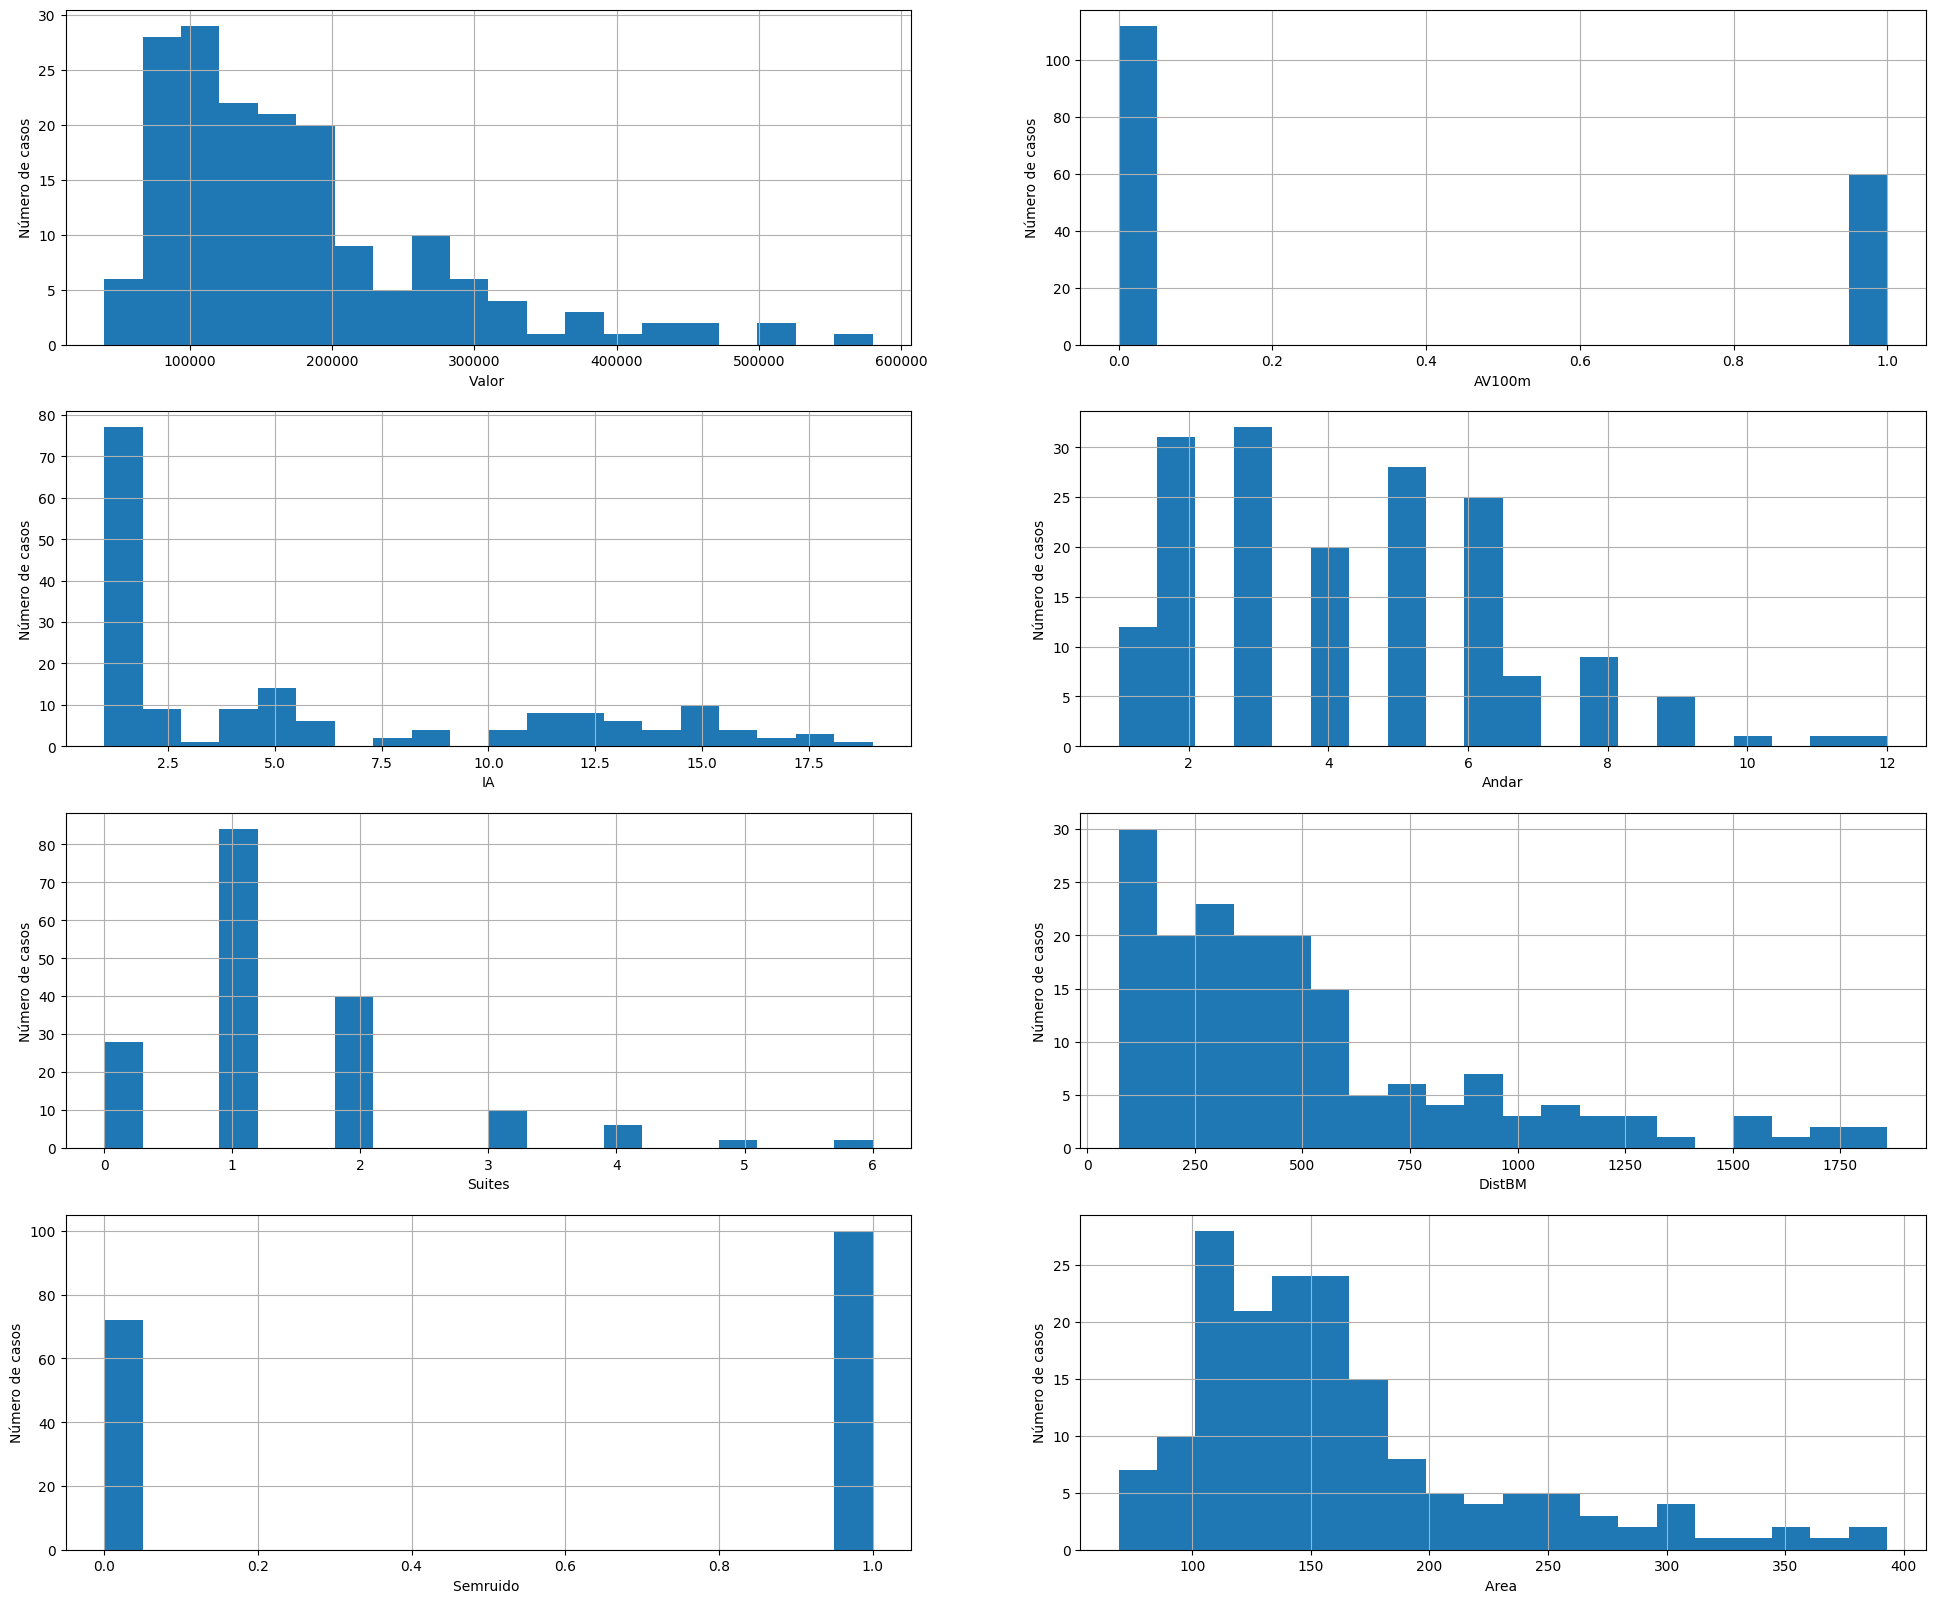

In [65]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis['Valor'].hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 2)
fig = imoveis['AV100m'].hist(bins=20)
fig.set_xlabel('AV100m')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 3)
fig = imoveis['IA'].hist(bins=20)
fig.set_xlabel('IA')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 4)
fig = imoveis['Andar'].hist(bins=20)
fig.set_xlabel('Andar')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 5)
fig = imoveis['Suites'].hist(bins=20)
fig.set_xlabel('Suites')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = imoveis['DistBM'].hist(bins=20)
fig.set_xlabel('DistBM')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = imoveis['Semruido'].hist(bins=20)
fig.set_xlabel('Semruido ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 8)
fig = imoveis['Area'].hist(bins=20)
fig.set_xlabel('Area ')
fig.set_ylabel('Número de casos')


Text(0, 0.5, 'Suites')

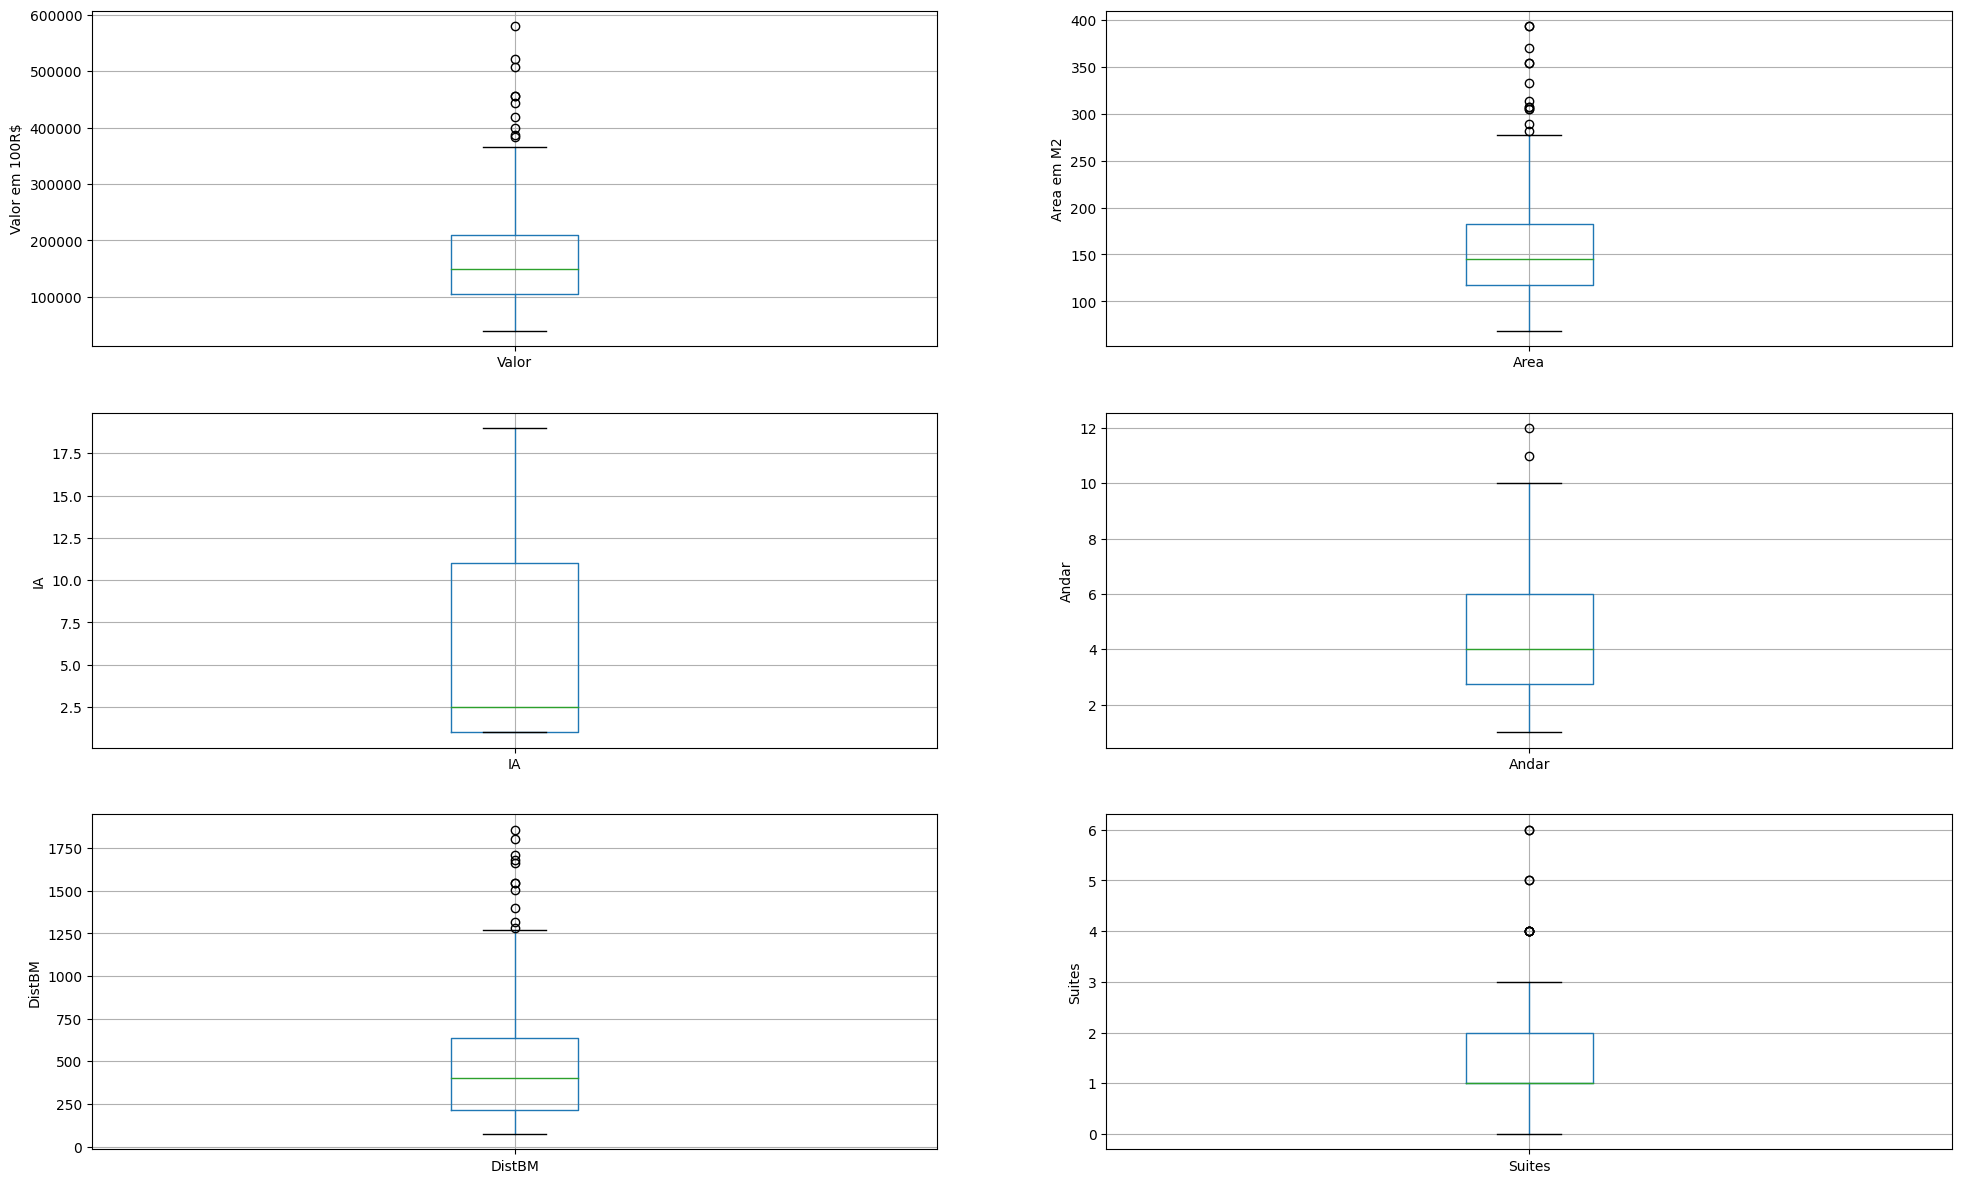

In [66]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em 100R$')


plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M2')


plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Suites')




In [67]:
# Importante nessa etapa é avaliar se tem alguma variável com presença de outliers ou daados extremos
# Antes de ir para a correlação avaliar o que fazer!!!!!!!!!!!corrigir, eliminar....

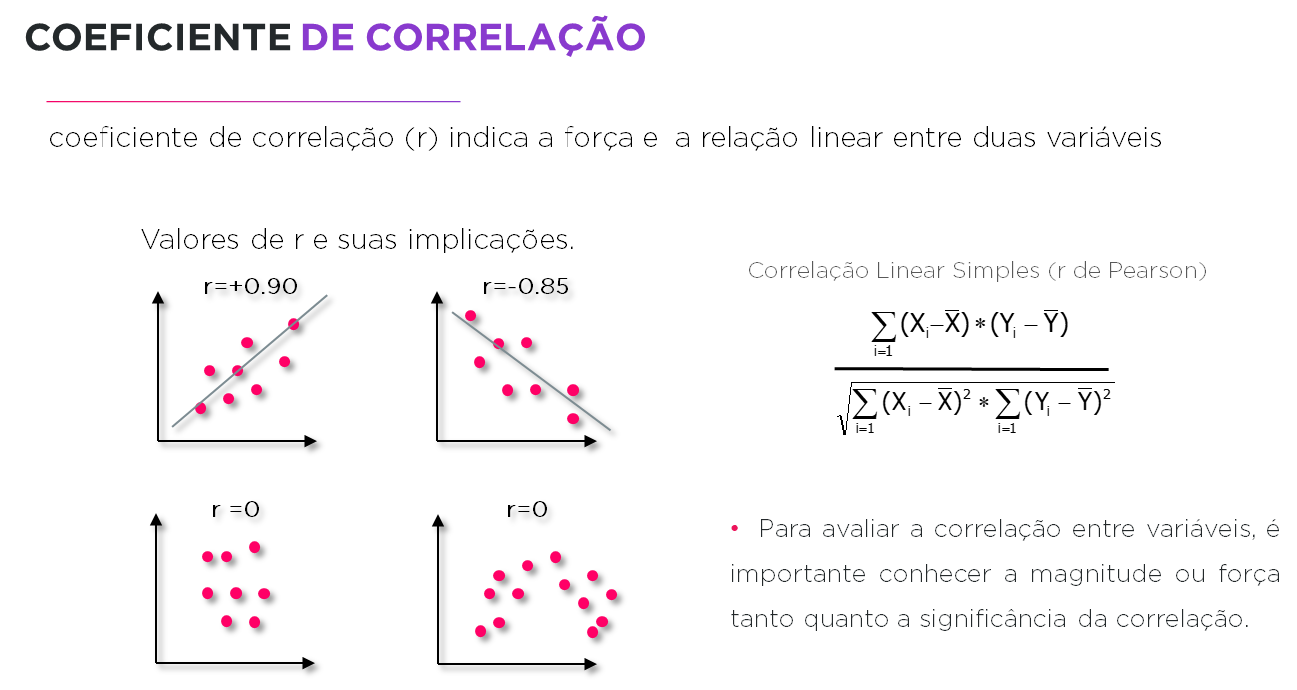

In [68]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

imoveis.corr().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Ordem,1.00,0.34,-0.15,0.01,0.02,0.26,0.15,0.05,0.01,-0.01
Valor,0.34,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37
Area,-0.15,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30
IA,0.01,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14
Andar,0.02,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22
Suites,0.26,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25
Vista,0.15,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34
DistBM,0.05,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10
Semruido,0.01,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23
AV100m,-0.01,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00


In [69]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = imoveis.corr(method='pearson')
corr

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Ordem,1.000000,0.342052,-0.150646,0.014221,0.022257,0.255865,0.151733,0.054846,0.010444,-0.013759
Valor,0.342052,1.000000,0.772846,-0.325379,0.307248,0.722929,0.271163,-0.053489,0.221166,0.370780
Area,-0.150646,0.772846,1.000000,-0.153889,0.162306,0.527777,0.086575,-0.123760,0.107167,0.295078
IA,0.014221,-0.325379,-0.153889,1.000000,-0.379168,-0.319479,-0.007518,-0.009442,-0.143307,-0.144353
Andar,0.022257,0.307248,0.162306,-0.379168,1.000000,0.233648,0.014152,0.248249,0.017672,0.219631
Suites,0.255865,0.722929,0.527777,-0.319479,0.233648,1.000000,0.037509,-0.113931,0.120263,0.252755
Vista,0.151733,0.271163,0.086575,-0.007518,0.014152,0.037509,1.000000,-0.095942,0.035593,0.338953
DistBM,0.054846,-0.053489,-0.123760,-0.009442,0.248249,-0.113931,-0.095942,1.000000,0.402139,-0.104872
Semruido,0.010444,0.221166,0.107167,-0.143307,0.017672,0.120263,0.035593,0.402139,1.000000,0.225421
AV100m,-0.013759,0.370780,0.295078,-0.144353,0.219631,0.252755,0.338953,-0.104872,0.225421,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

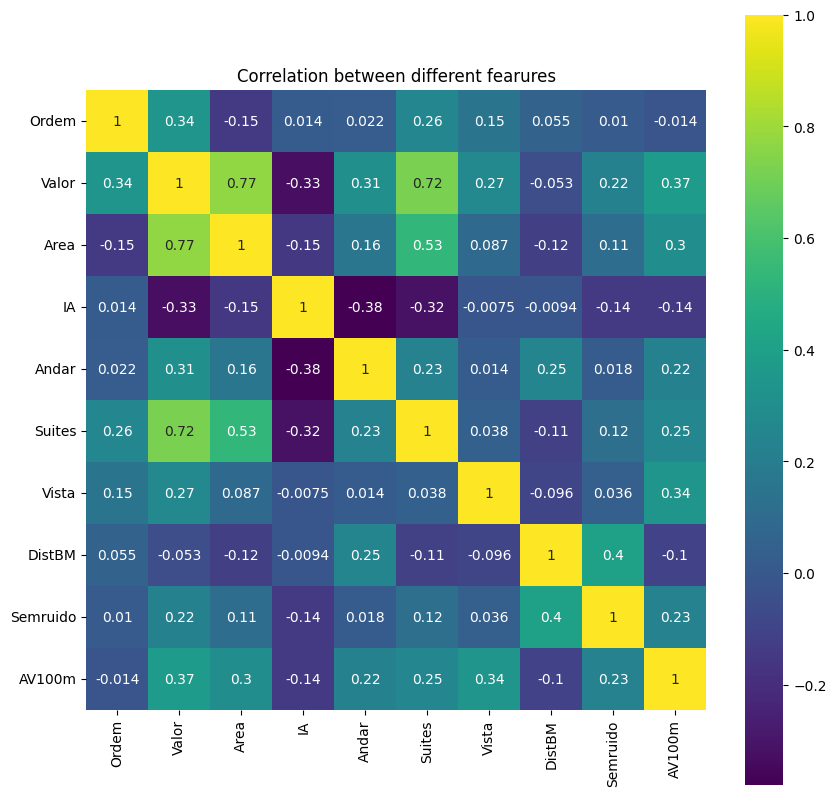

In [70]:
correlation = imoveis.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Text(0.5, 1.0, ' Scatter plot Valor versus Area em m2')

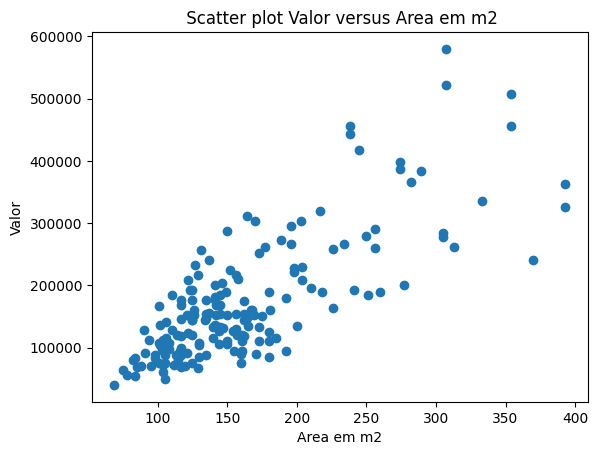

In [71]:
# Em uma análise descritiva sempre utilizar a variável Target - De acordo com o objetivo
# gráfico quando a variável preditora quantitativa 

# Gráfico de dispersão ou scatterplot
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel("Area em m2")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Area em m2")

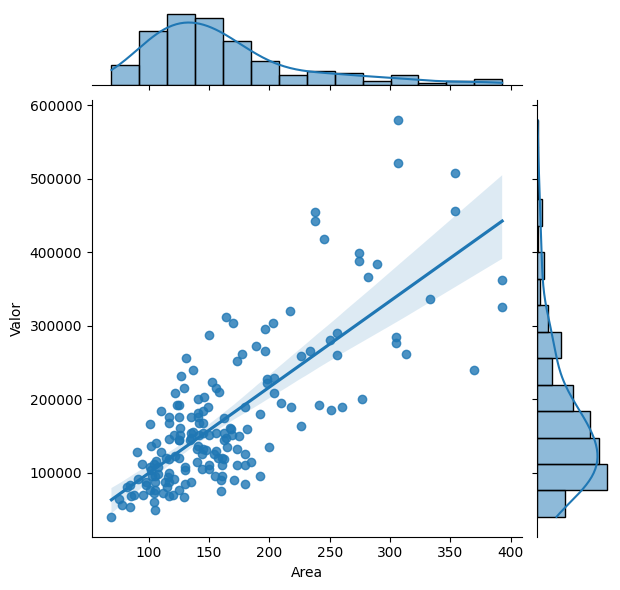

In [72]:
# Gráfico de dispersão 
sb.jointplot(x='Area', y='Valor', data=imoveis, kind='reg')

Text(0.5, 4.444444444444281, 'Suites')

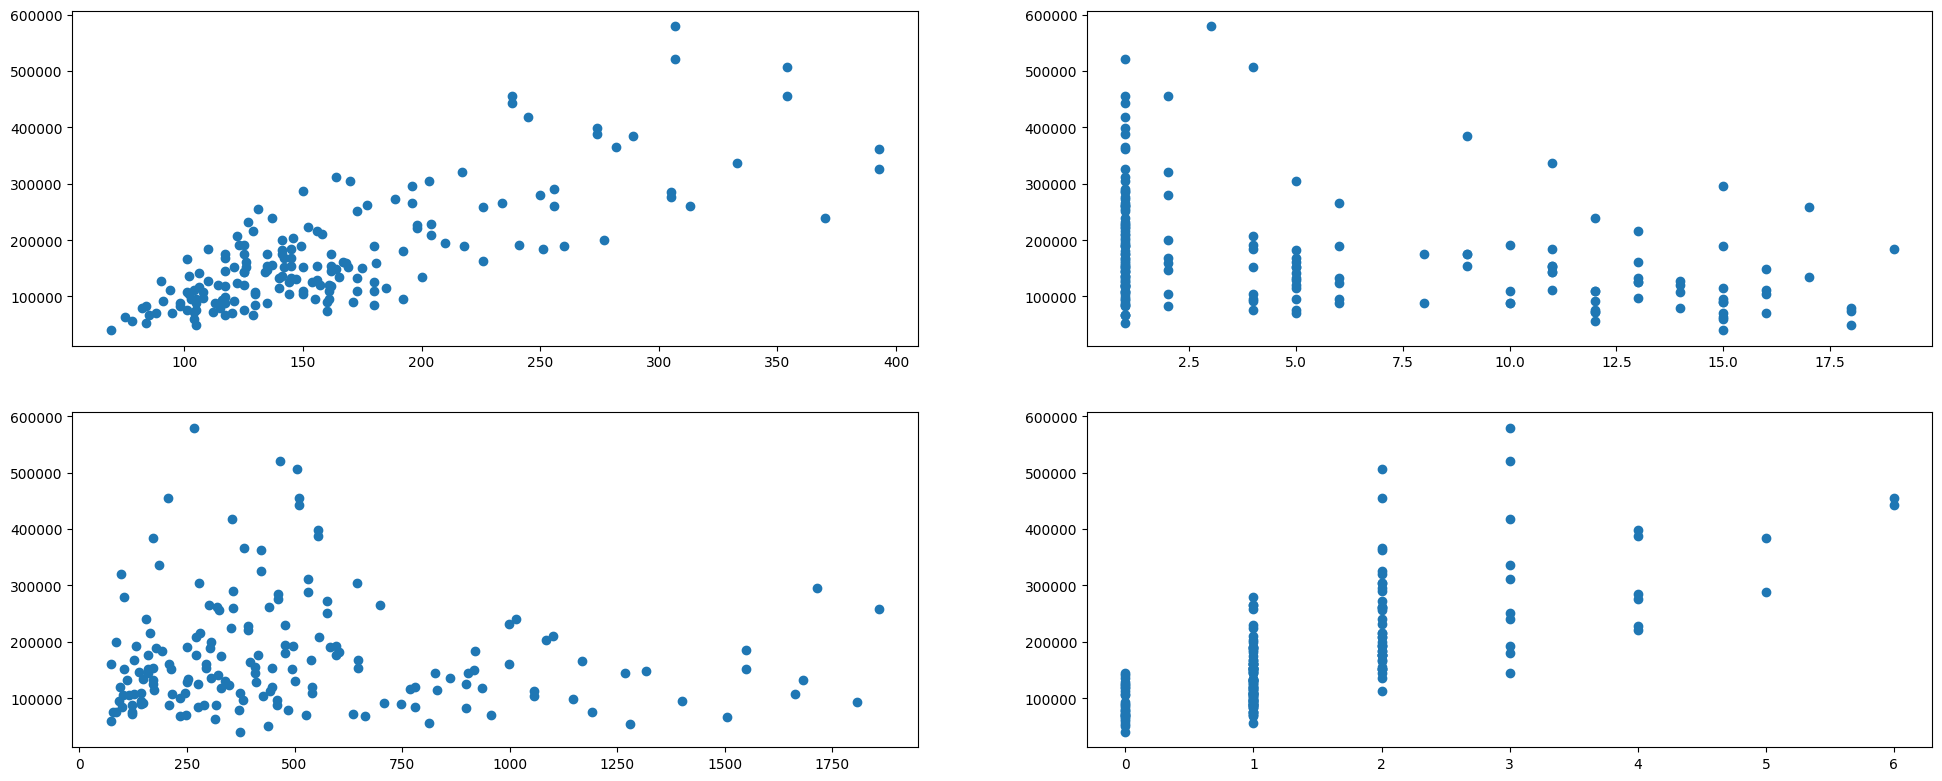

In [73]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(imoveis['Area'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Area')

plt.subplot(4, 2, 2)

plt.scatter(imoveis['IA'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('IA')


plt.subplot(4, 2, 3)

plt.scatter(imoveis['DistBM'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('DistBM')


plt.subplot(4, 2, 4)

plt.scatter(imoveis['Suites'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Suites')


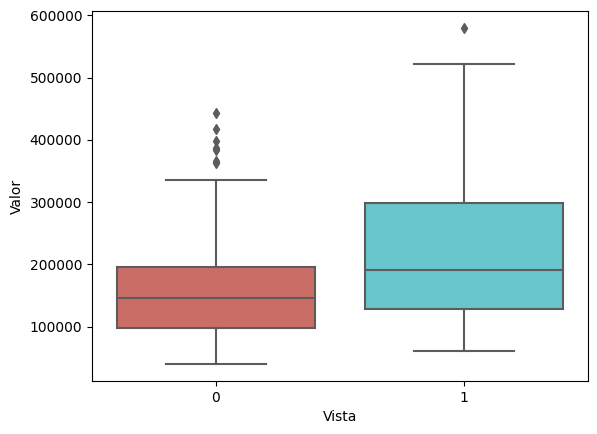

In [74]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');

<AxesSubplot:xlabel='Semruido', ylabel='Valor'>

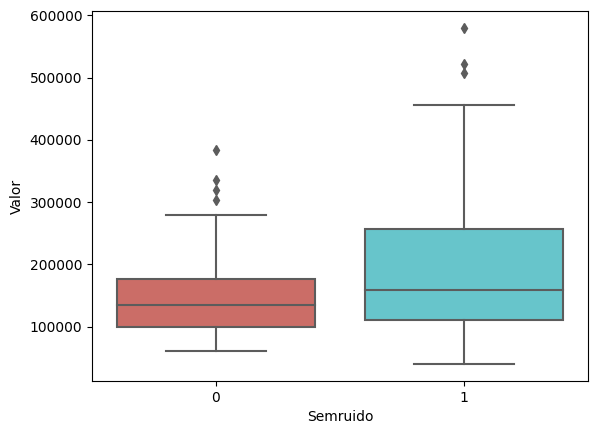

In [75]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

<AxesSubplot:xlabel='AV100m', ylabel='Valor'>

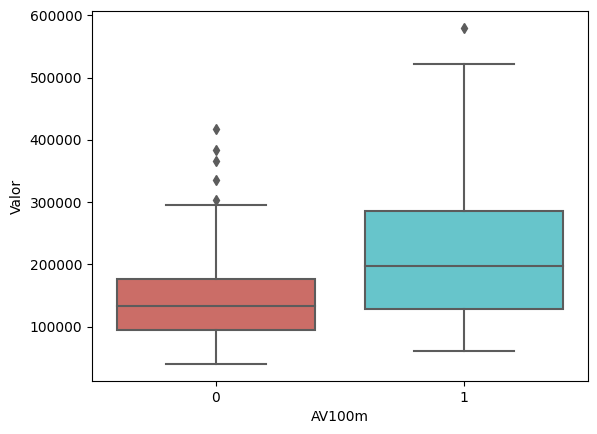

In [76]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

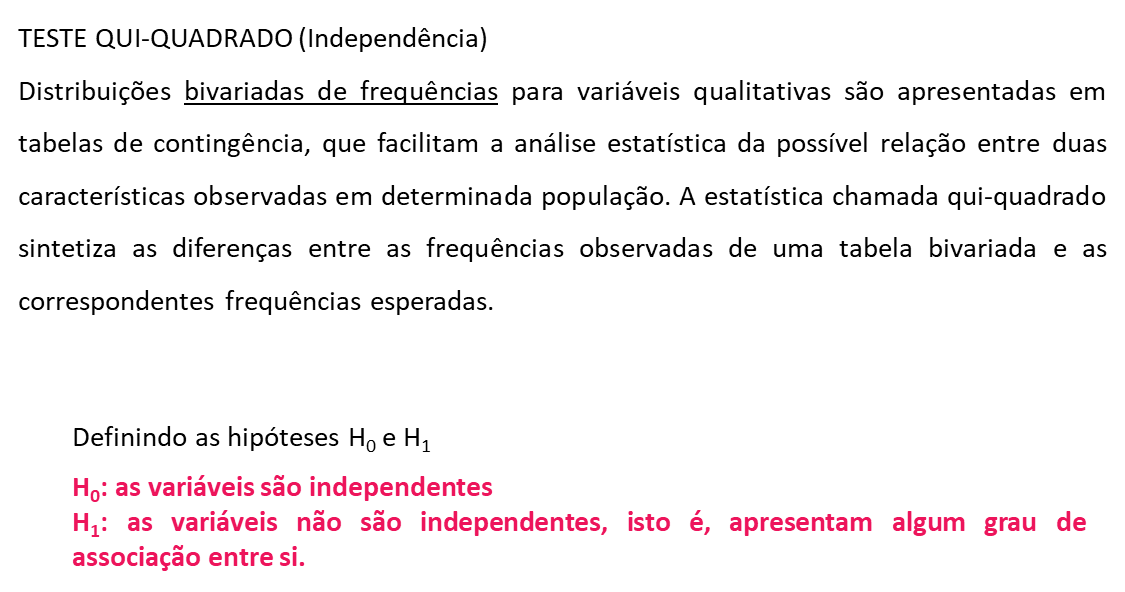

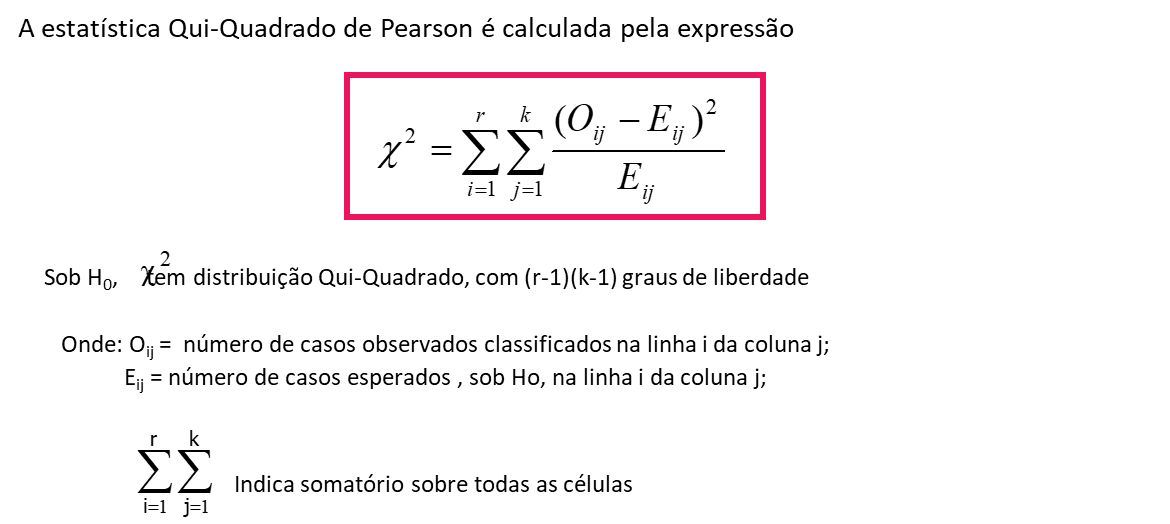

In [77]:
# Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
# transformar a variável Valor do Imovel em qualitativa --> faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal)
# criar a faixa_vlr você usar os quartis 

In [78]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
#minimo = min.(df['total'])   
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)


104750.0 149000.0 209250.0 579840


In [79]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

In [80]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ordem     172 non-null    int64  
 1   Valor     172 non-null    int64  
 2   Area      172 non-null    int64  
 3   IA        172 non-null    int64  
 4   Andar     172 non-null    int64  
 5   Suites    172 non-null    int64  
 6   Vista     172 non-null    int64  
 7   DistBM    172 non-null    int64  
 8   Semruido  172 non-null    int64  
 9   AV100m    172 non-null    int64  
 10  fx_total  172 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 14.9 KB


In [81]:
# crosstab tabela cruzada entre duas variáveis qualitativas

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

Semruido,0,1,All
fx_total,,,
1.0,20,23,43
2.0,22,21,43
3.0,21,22,43
4.0,9,34,43
All,72,100,172


In [82]:
# Uma variável sem_ruído
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

1    58.139535
0    41.860465
Name: Semruido, dtype: float64

In [83]:
table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [84]:
print(table)

Semruido   0   1
fx_total        
1.0       20  23
2.0       22  21
3.0       21  22
4.0        9  34


In [85]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [86]:

stat, p, dof, expected = chi2_contingency(table)
p


0.014685713198671485

####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)

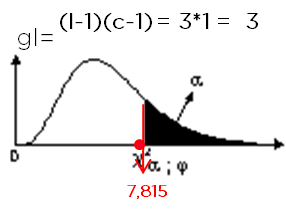

In [87]:
print('Graus de liberdade: dof=%d' % dof)

print('\n Tabela Esperada:')
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('\n probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('\n significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')

Graus de liberdade: dof=3

 Tabela Esperada:
[[18. 25.]
 [18. 25.]
 [18. 25.]
 [18. 25.]]

 probability=0.950, critical=7.815, stat=10.511

 Dependent (reject H0)

 significance=0.050, p=0.015

 Dependent (reject H0)


In [95]:
import researchpy

In [96]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

In [97]:
results1

(         Semruido          
 Semruido        0    1  All
 fx_total                   
 1.0            20   23   43
 2.0            22   21   43
 3.0            21   22   43
 4.0             9   34   43
 All            72  100  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   10.5111
 1                    p-value =    0.0147
 2                 Cramer's V =    0.2472)

In [98]:
results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')

In [99]:
results2

(         Vista         
 Vista        0   1  All
 fx_total               
 1.0         41   2   43
 2.0         36   7   43
 3.0         39   4   43
 4.0         32  11   43
 All        148  24  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    8.9099
 1                    p-value =    0.0305
 2                 Cramer's V =    0.2276)

In [100]:
results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')

In [101]:
results3

(         AV100m         
 AV100m        0   1  All
 fx_total                
 1.0          36   7   43
 2.0          30  13   43
 3.0          31  12   43
 4.0          15  28   43
 All         112  60  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   25.1857
 1                    p-value =    0.0000
 2                 Cramer's V =    0.3827)

####  Quais são os primeiros achados dessa análise exploratória?
